Nom : <votre nom>
Prénom : <votre prénom>


# Projet Fil Rouge

<description>

# Informations générales

Nom: <votre nom>
Prénom: <votre prénom>

# Importation des modules

Toutes les importations doivent être faites ici.

In [80]:
import sys
import json
import math
import datetime
from pprint import pprint
import matplotlib.pyplot as plt


# Partie 1 - Extraction des données


## Objectif

Vous devrez lire un fichier de données en format `json` et les exporter en format `csv`.


## Descrition des étapes

1. Lire les données à partir d'un fichier `json`
1. Afficher les différentes caractéristiques des données
1. Parcourir les données
1. Transformer la structure des données en matrice (liste de listes)
1. Exporter les données en format `csv`

## Partie 1.1 - Lire les données à partir d'un fichier `json`

Utilisez la librairie `json` pour lire le fichier `donnees.json` (fourni sur le site du cours).

In [81]:



def lireFichierJson(cheminFichier):

    with open(nomFichier, 'r') as fichier:
        donnnesJson = json.load(fichier)
    
    return donnnesJson




lesDonnees = lireFichierJson('donnees.json')



## Partie 1.2 - Afficher les différentes caractéristiques des données

- Quelle est la structure principale des données (liste, dictionnaires, ensemble, ...)?
- Combien d'éléments contient cette structure?
- Affichez un des éléments.
- Quelle est la structure de cet élément?
- Combien d'éléments contient cette structure?
- Quelles sont ces éléments?

Il est recommandé d'utiliser un visualisateur de données pour le format `json` afin de bien comprendre comment les données sont organisées.

Que représente chacun des éléments?

In [82]:


print("Type : ", getType(lesDonnees))
print("Nombre d'éléments : ", len(lesDonnees))
print("Un élément : ", lesDonnees[0])
print("Type d'un élément : ", type(lesDonnees[0]))
print("Longueur d'un élément : ", len(lesDonnees[0]))
print("Clef d'un élément : ", lesDonnees[0].keys())


Type :  <class 'list'>
Nombre d'éléments :  19341
Un élément :  {'id': '7037400.2020.7.19', 'type': 'Feature', 'geometry': {'coordinates': [-74.05, 45.8], 'type': 'Point'}, 'properties': {'SPEED_MAX_GUST': None, 'CLIMATE_IDENTIFIER': '7037400', 'SPEED_MAX_GUST_FLAG': None, 'HEATING_DEGREE_DAYS_FLAG': None, 'LOCAL_DAY': 19, 'SNOW_ON_GROUND': 0, 'TOTAL_PRECIPITATION': 0.8, 'DIRECTION_MAX_GUST': None, 'TOTAL_RAIN': 0.8, 'MAX_TEMPERATURE': 30, 'DIRECTION_MAX_GUST_FLAG': None, 'MAX_REL_HUMIDITY': None, 'MIN_TEMPERATURE_FLAG': None, 'LOCAL_DATE': '2020-07-19 00:00:00', 'MIN_TEMPERATURE': 19.5, 'TOTAL_RAIN_FLAG': None, 'SNOW_ON_GROUND_FLAG': None, 'MEAN_TEMPERATURE': None, 'LOCAL_MONTH': 7, 'MAX_REL_HUMIDITY_FLAG': None, 'MIN_REL_HUMIDITY': None, 'PROVINCE_CODE': 'QC', 'COOLING_DEGREE_DAYS_FLAG': None, 'MAX_TEMPERATURE_FLAG': None, 'ID': '7037400.2020.7.19', 'HEATING_DEGREE_DAYS': None, 'MEAN_TEMPERATURE_FLAG': None, 'TOTAL_PRECIPITATION_FLAG': None, 'LOCAL_YEAR': 2020, 'TOTAL_SNOW_FLAG': Non

## Partie 1.3 - Parcourir les données

Chaque élément contient une clef `properties` qui est associée à un autre dictionnaire.
Ce dictionnaire contient plusieurs propriétés.
La propriété `STATION_NAME` indique le nom de la station où la mesure a été prise.

- Parcourez toutes les données afin de compter combien de fois chaque station est présente dans le jeu de données.
- Affichez les résultats pour chaque station.
- Combien de stations différentes sont présentes dans le jeu de données?

In [83]:
def getStations(d):
    lesStations = {}
    for e in d:
        station = e['properties']['STATION_NAME']
        if station not in lesStations:
            lesStations[station] = 0
        lesStations[station] += 1
    return lesStations


s = getStations(lesDonnees)
pprint(s)
print("Nombre de stations : ", len(s))

{'AUTEUIL': 28,
 'IBERVILLE': 28,
 "L'ASSOMPTION": 1649,
 'LAPRAIRIE': 1521,
 'MASCOUCHE': 28,
 'MCTAVISH': 1646,
 'MONTREAL INTL A': 1649,
 'MONTREAL MIRABEL INTL A': 1649,
 'MONTREAL/PIERRE ELLIOTT TRUDEAU INTL': 1649,
 'MONTREAL/ST-HUBERT': 1649,
 'OKA': 1521,
 'RIVIERE DES PRAIRIES': 1521,
 'ST AMABLE': 28,
 'ST JANVIER': 28,
 'ST JEROME': 1521,
 'STE GENEVIEVE': 28,
 'STE THERESE OUEST': 28,
 'STE-ANNE-DE-BELLEVUE 1': 1649,
 'VERCHERES': 1521}
Nombre de stations :  19


## ?????

Question potentielle pour examen: comptez seulement les stations qui ont une valeur pour `MAX_TEMPERATURE`:

In [84]:
def getStations(d):
    lesStations = {}
    for e in d:
        station = e['properties']['STATION_NAME']
        if station not in lesStations:
            lesStations[station] = 0
        if e['properties']['MAX_TEMPERATURE'] is not None:
            lesStations[station] += 1
    return lesStations


s = getStations(lesDonnees)
pprint(s)
print("Nombre de stations : ", len(s))



{'AUTEUIL': 0,
 'IBERVILLE': 0,
 "L'ASSOMPTION": 1631,
 'LAPRAIRIE': 1429,
 'MASCOUCHE': 0,
 'MCTAVISH': 1635,
 'MONTREAL INTL A': 1618,
 'MONTREAL MIRABEL INTL A': 1606,
 'MONTREAL/PIERRE ELLIOTT TRUDEAU INTL': 1641,
 'MONTREAL/ST-HUBERT': 1631,
 'OKA': 1424,
 'RIVIERE DES PRAIRIES': 1521,
 'ST AMABLE': 0,
 'ST JANVIER': 0,
 'ST JEROME': 1504,
 'STE GENEVIEVE': 0,
 'STE THERESE OUEST': 0,
 'STE-ANNE-DE-BELLEVUE 1': 1637,
 'VERCHERES': 1492}
Nombre de stations :  19


## Partie 1.4 - Transformer la structure des données en matrice (liste de listes)

L'entête du fichier `csv` doit être :

`'id', 'coordinate_X', 'coordinate_Y', 'STATION_NAME', 'LOCAL_DATE', 'LOCAL_YEAR', 'LOCAL_MONTH', 'LOCAL_DAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_FLAG', 'TOTAL_SNOW', 'TOTAL_SNOW_FLAG', 'SPEED_MAX_GUST', 'SPEED_MAX_GUST_FLAG', 'MIN_TEMPERATURE', 'MIN_TEMPERATURE_FLAG', 'MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_FLAG', 'MAX_TEMPERATURE', 'MAX_TEMPERATURE_FLAG', 'MAX_REL_HUMIDITY', 'MAX_REL_HUMIDITY_FLAG'`

Créez une liste contenant l'entête.
Ajoutez cette liste dans une autre liste `resultat`.

Pour chaque éléments de `lesDonnées`, vous extraire les valeurs ci-dessus.
Chaque valeur doit être ajoutée dans une liste dans le même ordre que l'entête du fichier `csv`.
Lorsqu'une liste est complète, vous devez ajouter celle-ci dans la liste `resultat` (ce qui donnera une liste de listes).

Notez que les trois premiers éléments doivent être extraits "manuellement". Tandis que les suivants peuvent être tous extraits dans une boucles à partir de `properties`.

`coordinate_X` correspond à la longitude.
`coordinate_Y` correspond à la latitude.



In [85]:
def extractionDonnees(d):  
    resultat = []
    entete = ['id', 'coordinate_X', 'coordinate_Y', 'STATION_NAME', 'LOCAL_DATE', 'LOCAL_YEAR', 'LOCAL_MONTH', 'LOCAL_DAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_FLAG', 'TOTAL_SNOW', 'TOTAL_SNOW_FLAG', 'SPEED_MAX_GUST', 'SPEED_MAX_GUST_FLAG', 'MIN_TEMPERATURE', 'MIN_TEMPERATURE_FLAG', 'MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_FLAG', 'MAX_TEMPERATURE', 'MAX_TEMPERATURE_FLAG', 'MAX_REL_HUMIDITY', 'MAX_REL_HUMIDITY_FLAG']
    resultat.append(entete)

    for e in d:
        ligne = []
        ligne.append(e['id'])
        ligne.append(e['geometry']['coordinates'][0])
        ligne.append(e['geometry']['coordinates'][1])
        for i in range(3, len(entete)):
            ligne.append(e['properties'][entete[i]])
        resultat.append(ligne)
    return resultat


resultat = extractionDonnees(lesDonnees)


Partie 1.5 - Exporter les données en format `csv`

Exportez `resultat` en format `csv`.
Le nom du fichier doit être `donnees.csv`

- Assurez-vous que toutes les données sont dans le fichier `csv`
    - Le nombre d'éléments
    - Le nombre de colonnes
- Notez la différence de grosseur des fichiers `json` et `csv`. Selon vous, pourquoi?


In [86]:
def sauvegarderCSV(nomFichierCSV, res):
    with open(nomFichierCSV, mode='w') as fichier:
        for ligne in res:
            r = ""
            for e in ligne:
                r += str(e) + ","
            r += '\n'
            fichier.write(r)
        
    #    Ici, je l'ai fait manuellement... mais il est possible d'utiliser le module csv

sauvegarderCSV('donnees.csv', resultat)

# Partie 2 - Affichage des données


## Objectif

Vous devez afficher les données sous forme de graphiques.

Plus précisément, vous devrez afficher un nuage de points d'une variable (ex: température max), d'un point géographique en particulier, pour une plage de temps.

Point géographique: `-74, 45.51`


## Descrition des étapes
1. Trouver la station météorologique la plus proche du point géographique.
1. Extraire les données pour une station pour la plage de temps.
1. ....




# Partie 2.1 - Trouver Station la plus proche

- Créez un dictionnaire contenant les stations (clefs) et leurs coordonnées géographiques.
- Pour chacune des stations, calculez la distance avec le point géographique.
- Ordonnez la liste (la première devrait être la station la plus proche)

In [87]:

def extraireStationsGeo(d):
    resultat = {}
    for e in d:
        if e['properties']['STATION_NAME'] not in resultat:
            resultat[e['properties']['STATION_NAME']] = (e['geometry']['coordinates'][0], e['geometry']['coordinates'][1])
    return resultat


def trouverDistance(stations, point):
    resultat = []
    for s, geo in stations.items():
        distance = math.sqrt(pow(geo[0] - point[0], 2) + pow(geo[1] - point[1], 2))
        resultat.append((distance, s))
    resultat.sort()
    return resultat


pointGeographique = (-74, 45.51)
lesStations = extraireStationsGeo(lesDonnees)
distancesStations = trouverDistance(lesStations, pointGeographique)

print("Station la plus proche : ", distancesStations[0])
# pprint(distancesStations)

Station la plus proche :  (0.06741249472051823, 'OKA')


## Partie 2.2 - Extraire les données

- Créez deux listes: `temps` et `valeurs`
- Pour chaque élément de `lesDonnees`, vérifiez si l'élément correspond aux critère (temps, variables, station) et ajoutez la date et la valeur dans les listes respectives.
- Afficher à l'aide de Mathplotlib:
    - Ajoutez un titre
    - Ajoutez le nom des axes x et y

[datetime.datetime(2020, 5, 9, 0, 0), datetime.datetime(2020, 10, 31, 0, 0), datetime.datetime(2020, 12, 29, 0, 0), datetime.datetime(2020, 6, 7, 0, 0), datetime.datetime(2020, 6, 16, 0, 0)]
[-2, -6.3, -10.7, 10.4, 11.3]


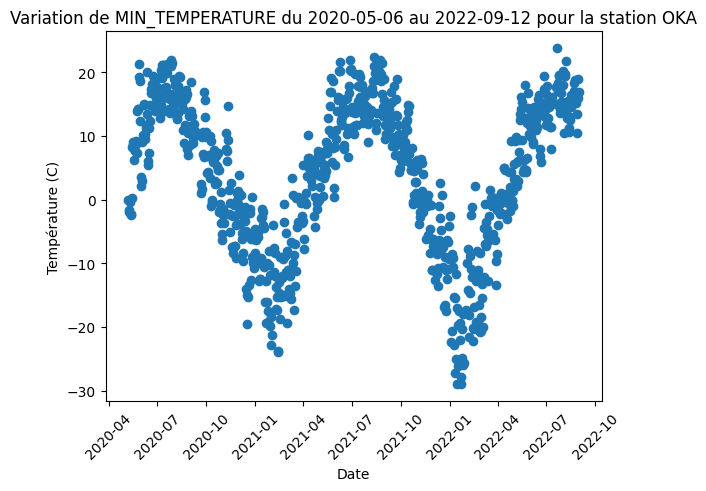

In [95]:
def conversionTexteDate(dateStr):
    return datetime.datetime.strptime(dateStr, "%Y-%m-%d")

def extraireValeur(d, debut, fin, station, nomVariable):
    temps = []
    valeurs = []

    for e in d:
        laDate = e['properties']['LOCAL_DATE'][:10]
        if  debut < laDate < fin and e['properties']['STATION_NAME'] == station:
            temps.append(conversionTexteDate(laDate))
            valeurs.append(e['properties'][nomVariable])
            
    return temps, valeurs



debut = "2020-05-06"
fin  = "2022-09-12"
variable = "MIN_TEMPERATURE"

x, y = extraireValeur(lesDonnees, debut, fin, distancesStations[0][1], variable)

print(x[:5])
print(y[:5])

plt.scatter(x, y)

plt.title(f'Variation de {variable} du {debut} au {fin} pour la station {distancesStations[0][1]}')
plt.xlabel('Date')
plt.ylabel('Température (C)')
plt.xticks(rotation=45)
plt.show()

# Partie 3 - Nettoyage des données


## Objectif

Les données de l'étape précédente ont des données manquantes et erronées.
Vous devrez remplacer les données manquantes et corriger les données erronées.


## Descrition des étapes
1. mmmmm
1. jjjjj
1. ....

In [89]:
# mettre un squelette du code ...

# Partie 4 - Analyse des données


## Objectif

Vous devez utiliser des librairies `Python` afin d'analyser les données.

## Descrition des étapes
1. mmmmm
1. jjjjj
1. ....

In [90]:
# mettre un squelette du code ...